## Since my LDA script died without displaying results, here I load the models and do coherence metrics on them

In [24]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import gensim
import pickle
import pandas as pd


In [7]:
corpus = pickle.load(open('movies_corpus.pkl', 'rb'))
dictionary = Dictionary.load('movies_dictionary.gensim')


In [15]:
TOPIC_SIZES = [5, 10, 15, 20, 25, 30, 40, 50, 60]
results = []
for topic_size in TOPIC_SIZES:
    fname = 'movies_topics_' + str(topic_size) + '.gensim'
    ldatmp = LdaModel.load(fname) #, mmap='r')
    cm = CoherenceModel(model=ldatmp, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print (topic_size, coherence)
    results.append((topic_size, coherence))

print (results)

5 -1.5017030767554833
10 -1.7466992788270357
15 -2.0914635993686392
20 -2.356574314374245
25 -2.7079870709406015
30 -3.497461721622914
40 -3.2266735710470145
50 -3.946754633159057
60 -5.058233242826591
[(5, -1.5017030767554833), (10, -1.7466992788270357), (15, -2.0914635993686392), (20, -2.356574314374245), (25, -2.7079870709406015), (30, -3.497461721622914), (40, -3.2266735710470145), (50, -3.946754633159057), (60, -5.058233242826591)]


In [19]:
import matplotlib.pyplot as plt

In [22]:
sizes = [xy[0] for xy in results]
coherences = [xy[1] for xy in results]

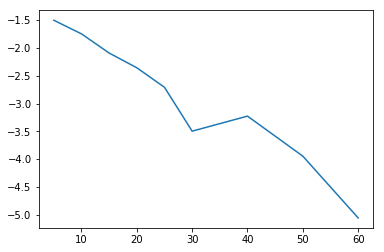

In [23]:
plt.plot(sizes, coherences)

In [26]:
# c_v metric requires the texts (list of list of str)
reviews = pd.read_csv("..\\Data_Processing\\cleaned.csv",encoding="utf-8")
texts = reviews["cleaned"].apply(lambda s: s.split(' '))

In [27]:
TOPIC_SIZES = [5, 10, 15, 20, 25, 30, 40, 50, 60]
results_cv = []
for topic_size in TOPIC_SIZES:
    fname = 'movies_topics_' + str(topic_size) + '.gensim'
    ldatmp = LdaModel.load(fname) #, mmap='r')
    cm = CoherenceModel(model=ldatmp, texts=texts, coherence='c_v')
    coherence = cm.get_coherence()
    print (topic_size, coherence)
    results_cv.append((topic_size, coherence))

print (results_cv)

5 0.31519890368774384
10 0.3559736725066792
15 0.4179739945727181
20 0.40434517109739937
25 0.41498168564606047
30 0.40551916529431326
40 0.42329546235587134
50 0.41460830225761147
60 0.40425941580730446
[(5, 0.31519890368774384), (10, 0.3559736725066792), (15, 0.4179739945727181), (20, 0.40434517109739937), (25, 0.41498168564606047), (30, 0.40551916529431326), (40, 0.42329546235587134), (50, 0.41460830225761147), (60, 0.40425941580730446)]


In [28]:
sizes_cv = [xy[0] for xy in results_cv]
coherences_cv = [xy[1] for xy in results_cv]

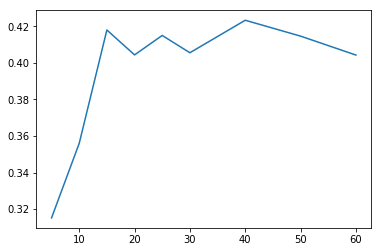

In [29]:
plt.plot(sizes_cv, coherences_cv)